# Regression 실습 Classify LoL ranked games outcome by looking at the first 10min worth of data

- 고렙 유저(다이아)들의 게임 플레이 최소 10분 동안의 데이터를 바탕으로 승패 분류 예측

### data source : high_diamond_ranked_10min

https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

----------------

## 0. 모듈 임포트

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----------------

## 1. 데이터 호출

In [25]:
df = pd.read_csv('./data/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


(Blue Team이 아군인듯?)

- gameId : Unique RIOT ID of the game.
- blueWins(★) : The target column. 1 if the blue team has won, 0 otherwise.
- blueWardsPlaced : Number of warding totems placed by the blue team on the map
- blueWardsDestroyed : Number of enemy warding totems the blue team has destroyed
- blueFirstBlood : First kill of the game. 1 if the blue team did the first kill, 0 otherwise
- blueKills : Number of enemies killed by the blue team
- blueDeaths : Number of deaths (blue team)
- blueAssists : Number of kill assists (blue team)
- blueEliteMonsters : Number of elite monsters killed by the blue team (Dragons and Heralds)
- blueDragons : Number of dragons killed by the blue team

----------------

# 2. EDA 및 데이터 기초 통계 분석

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [5]:
# 기본 메소드는 Pearson's correlation
df.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


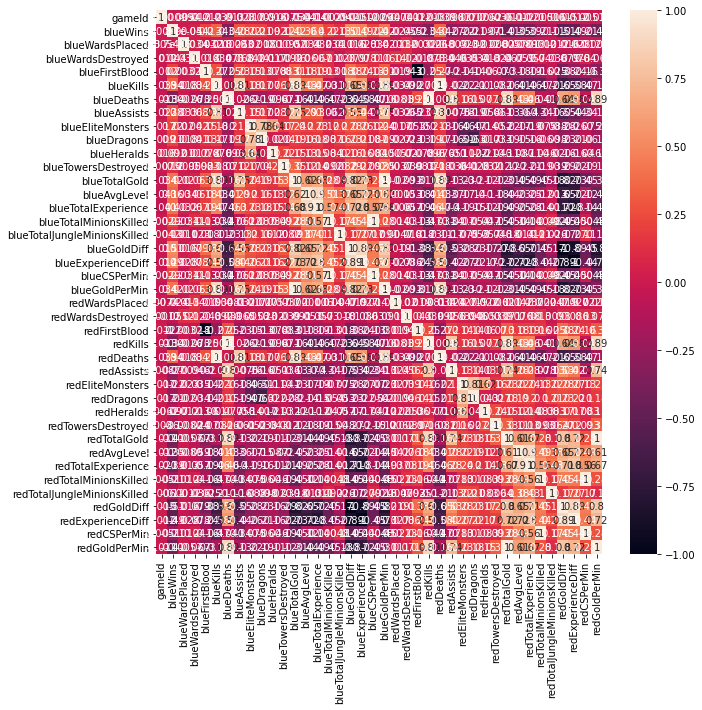

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

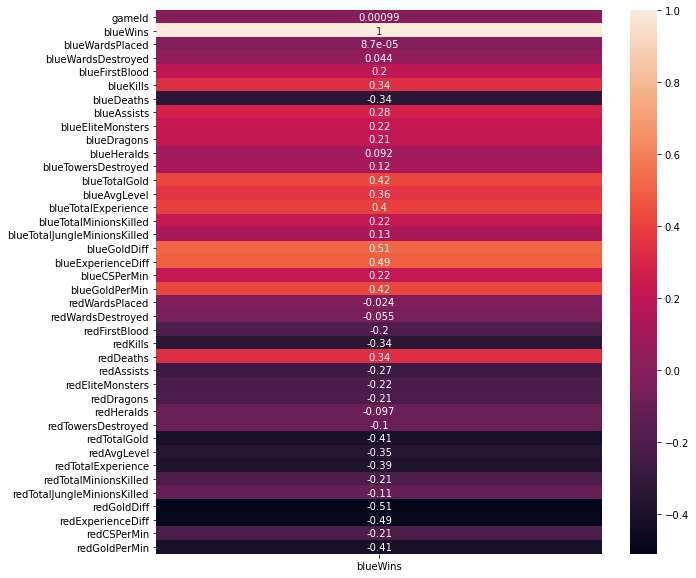

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr()[['blueWins']], annot=True)

### 각 칼럼과 승리 여불의 관계 시각화 하기

In [8]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

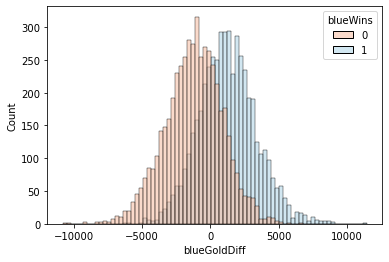

In [9]:
sns.histplot(x='blueGoldDiff', data=df, hue='blueWins', palette='RdBu')

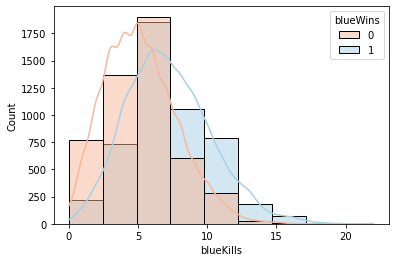

In [10]:
sns.histplot(x='blueKills', data=df, hue='blueWins', palette='RdBu', kde=True, bins=9)

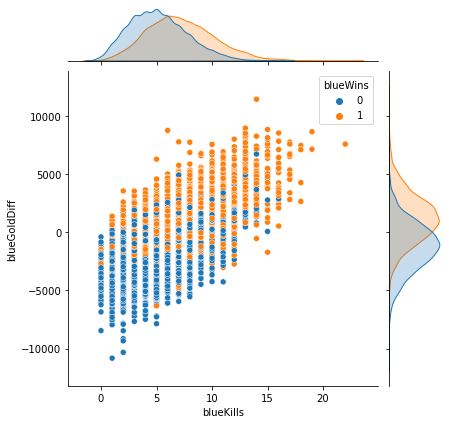

In [11]:
sns.jointplot(data=df, x='blueKills', y='blueGoldDiff', hue='blueWins')

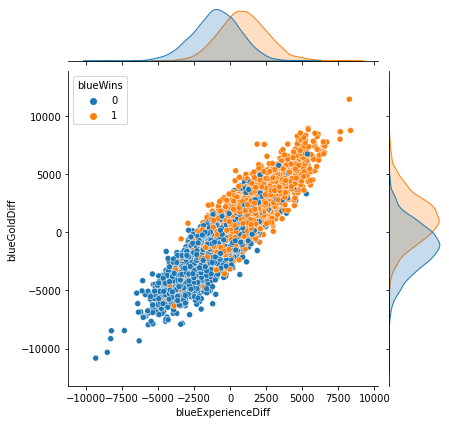

In [12]:
sns.jointplot(data=df, x='blueExperienceDiff', y='blueGoldDiff', hue='blueWins')

### 카테고리 피쳐의 상관성 분석

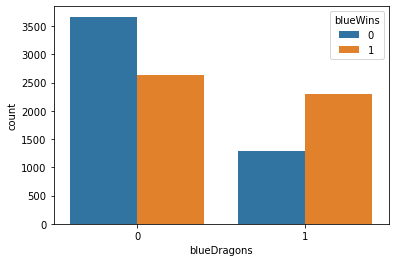

In [13]:
sns.countplot(x='blueDragons', data=df, hue='blueWins')

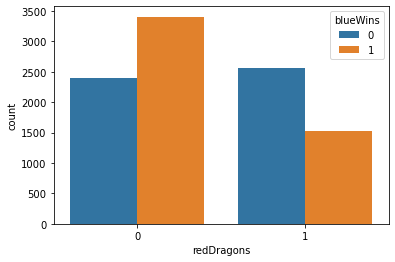

In [14]:
sns.countplot(x='redDragons', data=df, hue='blueWins')

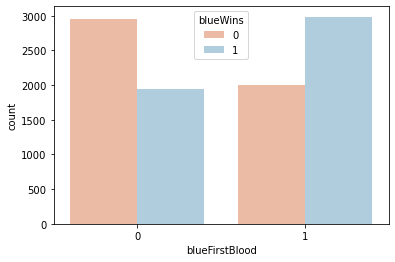

In [15]:
sns.countplot(x='blueFirstBlood', data=df, hue='blueWins', palette='RdBu')

----------------

# 3. 모델 학습을 위한 전처리

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [26]:
# blue와 관련된 것은 모두 남기고, red와 관련된 것 중 일부 필요한것만 남기고 칼럼 삭제

df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience','redGoldDiff', 'redExperienceDiff'], axis=1, inplace=True)

In [27]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [84]:
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed', 
            'blueDeaths', 'blueAssists', 'blueEliteMonsters',
            'blueTowersDestroyed', 'blueTotalGold','blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 
            'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 
            'redWardsPlaced', 'redWardsDestroyed','redAssists', 'redEliteMonsters','redTowersDestroyed', 
            'redAvgLevel', 'redTotalMinionsKilled','redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueDragons','redDragons','blueHeralds','redHeralds', 'blueFirstBlood']]

y = df['blueWins']

In [85]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
# X_scaled = fit_transfrom(X_num)

X_scaled 

array([[ 0.31699566, -0.37927514, -0.04692613, ...,  0.36768454,
        -0.9287406 ,  0.05229268],
       [-0.57099219, -0.83906887, -0.38779619, ...,  0.06850362,
         1.0337835 ,  0.75861871],
       [-0.40449447, -1.2988626 ,  1.65742416, ..., -2.32494376,
        -0.65490002,  0.5339091 ],
       ...,
       [ 0.03949946, -0.83906887,  0.29394392, ...,  0.86631941,
         1.9922255 ,  1.22749041],
       [-0.45999371,  0.54031232, -1.06953631, ..., -1.12822007,
         1.35326417, -0.79892075],
       [-0.23799674, -1.2988626 , -0.04692613, ..., -0.52985823,
        -0.74618022, -0.77141898]])

In [86]:
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)
X_scaled

,blueWardsPlaced,blueWardsDestroyed,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,...,redWardsPlaced,redWardsDestroyed,redAssists,redEliteMonsters,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0.316996,-0.379275,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,...,-0.399207,1.532493,0.329496,-0.914893,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293
1,-0.570992,-0.839069,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,...,-0.561751,-0.805870,-1.148188,2.277700,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619
2,-0.404494,-1.298863,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,...,-0.399207,0.129475,1.807181,-0.914893,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909
3,1.149484,-0.839069,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,...,-0.399207,-0.338198,0.822058,-0.914893,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406
4,2.925460,0.540312,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,...,-0.290844,-0.338198,0.083215,0.681403,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,...,1.280419,0.129475,0.083215,-0.914893,-0.198353,-0.410475,0.531742,-1.726582,0.531742,-0.833801
9875,1.759976,-1.298863,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,...,-0.561751,8.547582,-0.901908,-0.914893,-0.198353,0.244627,-0.517980,0.467412,-0.517980,-0.692938
9876,0.039499,-0.839069,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,...,-0.453388,-1.273543,1.068338,0.681403,-0.198353,1.554831,1.992226,0.866319,1.992226,1.227490
9877,-0.459994,0.540312,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,...,2.364049,0.597148,-1.394469,-0.914893,-0.198353,0.899729,1.353264,-1.128220,1.353264,-0.798921


In [87]:
X = pd.concat([X_scaled, X_cat], axis=1)
X

,blueWardsPlaced,blueWardsDestroyed,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,...,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueDragons,redDragons,blueHeralds,redHeralds,blueFirstBlood
0,0.316996,-0.379275,-0.046926,1.071495,-0.879231,-0.210439,0.460179,-1.035635,-0.740639,-0.992782,...,-0.410475,-0.928741,0.367685,-0.928741,0.052293,0,0,0,0,1
1,-0.570992,-0.839069,-0.387796,-0.404768,-0.879231,-0.210439,-1.166792,-1.035635,-1.385391,-1.953558,...,-0.410475,1.033784,0.068504,1.033784,0.758619,0,1,0,1,0
2,-0.404494,-1.298863,1.657424,-0.650812,0.719503,-0.210439,-0.254307,-1.691092,-1.422043,-1.404543,...,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,1,0,0,0,0
3,1.149484,-0.839069,-0.387796,-0.404768,0.719503,-0.210439,-0.876959,0.275280,0.021567,-0.718275,...,0.244627,0.805583,-0.430131,0.805583,-0.007406,0,0,1,0,0
4,2.925460,0.540312,-0.046926,-0.158724,-0.879231,-0.210439,-0.067382,0.275280,0.512211,-0.306513,...,0.244627,0.349182,1.564408,0.349182,0.613731,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,-0.293496,-0.379275,-0.728666,-0.404768,0.719503,-0.210439,0.821656,0.930738,0.865408,-0.260762,...,-0.410475,0.531742,-1.726582,0.531742,-0.833801,1,0,0,0,1
9875,1.759976,-1.298863,-0.728666,0.333364,0.719503,-0.210439,-0.172894,0.930738,1.105315,0.745765,...,0.244627,-0.517980,0.467412,-0.517980,-0.692938,1,0,0,0,0
9876,0.039499,-0.839069,0.293944,-0.404768,-0.879231,-0.210439,-0.391082,0.275280,0.086541,-0.306513,...,1.554831,1.992226,0.866319,1.992226,1.227490,0,1,0,0,0
9877,-0.459994,0.540312,-1.069536,-0.896856,0.719503,-0.210439,-1.331573,-1.035635,-0.582367,0.334004,...,0.899729,1.353264,-1.128220,1.353264,-0.798921,1,0,0,0,1


--------------

# 데이터 분리하기

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

--------------

# Classification 모델 학습하기

### ▼ Logistic Regression 모델 생성/학습하기

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [91]:
model_lr = LogisticRegression()

In [92]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [93]:
pred = model_lr.predict(X_test)

In [94]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



### ▼ XGBoost 모델 생성/학습하기

In [95]:
from xgboost import XGBClassifier

In [96]:
model_xgb = XGBClassifier()

In [97]:
model_xgb.fit(X_train, y_train)

C:\Users\44455\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
pred = model_xgb.predict(X_test)

In [100]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1469
           1       0.73      0.72      0.72      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



--------------

# 모델 학습 결과 심화 분석하기

### ▼ Logistic Regression 모델 계수롤 상관성 파악하기

In [104]:
model_lr.coef_.shape

(1, 30)

In [108]:
model_lr.coef_

array([[-0.03476675, -0.02140701, -0.00049816, -0.04582786,  0.11175907,
        -0.0899161 ,  0.24291331, -0.07348037,  0.03251575, -0.01495511,
         0.04670021,  0.42307071,  0.40094871, -0.01495511,  0.24291331,
        -0.02392475, -0.01400054,  0.0793408 , -0.07705014,  0.05652593,
        -0.00997849,  0.03901401,  0.03779667,  0.03901401, -0.44601577,
         0.16463217, -0.13070225, -0.10688725,  0.06976187,  0.03062203]])

In [106]:
model_lr.coef_[0]

array([-0.03476675, -0.02140701, -0.00049816, -0.04582786,  0.11175907,
       -0.0899161 ,  0.24291331, -0.07348037,  0.03251575, -0.01495511,
        0.04670021,  0.42307071,  0.40094871, -0.01495511,  0.24291331,
       -0.02392475, -0.01400054,  0.0793408 , -0.07705014,  0.05652593,
       -0.00997849,  0.03901401,  0.03779667,  0.03901401, -0.44601577,
        0.16463217, -0.13070225, -0.10688725,  0.06976187,  0.03062203])

<BarContainer object of 30 artists>

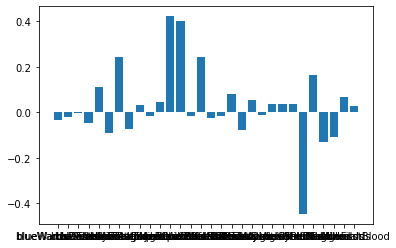

In [113]:
plt.bar(X.columns, model_lr.coef_[0])

In [114]:
model_coef = pd.DataFrame(data=model_lr.coef_[0], index = X.columns, columns=['Model coefficient'])

In [116]:
model_coef.sort_values(by='Model coefficient', ascending=False)

,Model coefficient
blueGoldDiff,0.423071
blueExperienceDiff,0.400949
blueTotalGold,0.242913
blueGoldPerMin,0.242913
blueDragons,0.164632
blueEliteMonsters,0.111759
redAssists,0.079341
redHeralds,0.069762
redTowersDestroyed,0.056526
blueTotalJungleMinionsKilled,0.046700


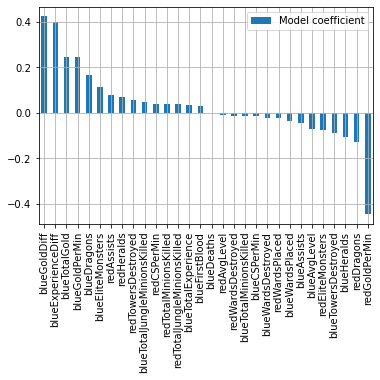

In [121]:
model_coef.sort_values(by='Model coefficient', ascending=False).plot.bar()
plt.grid()

In [131]:
xgb_df = pd.DataFrame(model_xgb.feature_importances_, index=X.columns, columns=['Model coefficient'])
xgb_df.sort_values('Model coefficient')

,Model coefficient
blueGoldPerMin,0.000000
redCSPerMin,0.000000
blueCSPerMin,0.000000
redAvgLevel,0.024473
redWardsPlaced,0.024489
blueWardsPlaced,0.024802
redTowersDestroyed,0.025007
redAssists,0.025731
blueTotalMinionsKilled,0.026245
redTotalJungleMinionsKilled,0.026270


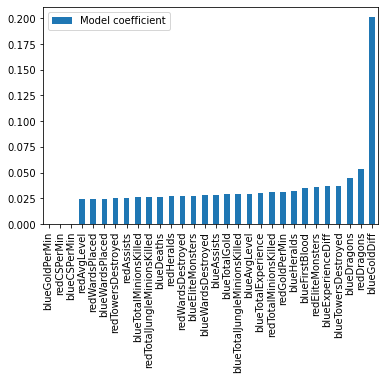

In [133]:
xgb_df.sort_values('Model coefficient').plot.bar()